In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np


In [3]:
df = pd.read_csv(r"C:\Users\srivathsa\Desktop\EVIndia.csv")  # Load your dataset here

# Drop any rows with missing values
df.dropna(inplace=True)


In [4]:
# Drop any rows with missing values
df.dropna(inplace=True)

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)

# Perform feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

# Create a DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df_encoded.columns)


In [5]:
# Train-test split
X_train, X_test = train_test_split(scaled_df, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, X_train)

LinearRegression()

In [6]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, X_train)  # Dummy fit, as there's no y_train


RandomForestRegressor(random_state=42)

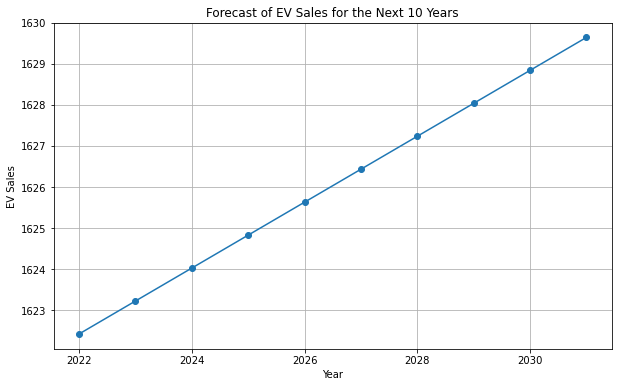

In [7]:
# Assuming a linear trend for simplicity
start_year = 2022  # Start year for forecasting
end_year = 2031    # End year for forecasting
years = np.arange(start_year, end_year + 1).reshape(-1, 1)  # Creating an artificial sequence of years

# Coefficients of the linear regression model
coefficients = model.coef_

# Forecasting sales for each year
forecast = []
for year in years:
    # Predicting sales for the year based on the linear trend
    sales_prediction = np.sum(coefficients * year)  # Linear equation: y = m*x + b
    forecast.append(sales_prediction)

# Plotting Forecast
plt.figure(figsize=(10, 6))
plt.plot(years, forecast, marker='o', linestyle='-')
plt.title('Forecast of EV Sales for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.grid(True)
plt.show()


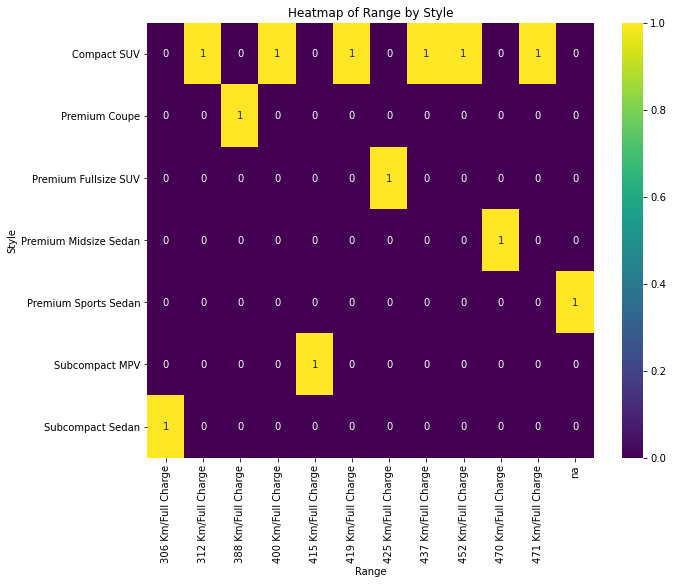

In [8]:
plt.figure(figsize=(10, 8))
heatmap_data = df.pivot_table(index='Style', columns='Range', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap of Range by Style')
plt.xlabel('Range')
plt.ylabel('Style')
plt.show()